## Python Crypto Bot (pycryptobot)

In [186]:
MARKET = 'BCH-GBP'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)
plt.rc('axes', titlesize=16)

sns.set_style('darkgrid')

**Load trading data CSV into a Pandas dataframe**

In [187]:
df = pd.read_csv('./data/' + MARKET + '_3600.csv')

**Display Pandas dataframe**

In [188]:
df

,date,market,granularity,low,high,open,close,volume,close_pc,cma,...,three_white_soldiers,three_black_crows,doji,three_line_strike,two_black_gapping,morning_star,evening_star,abandoned_baby,morning_doji_star,evening_doji_star
0,2021-02-03 01:00:00,BCH-GBP,3600,316.36,318.45,318.05,316.86,141.473288,0.00,316.860000,...,False,False,False,False,False,False,False,False,False,False
1,2021-02-03 02:00:00,BCH-GBP,3600,316.90,321.53,316.90,320.99,14.227563,1.30,318.925000,...,False,False,False,False,False,False,False,False,False,False
2,2021-02-03 03:00:00,BCH-GBP,3600,321.01,324.61,322.50,324.54,31.205738,1.11,320.796667,...,False,False,False,False,False,False,False,False,False,False
3,2021-02-03 04:00:00,BCH-GBP,3600,320.78,325.96,323.84,322.32,106.807731,-0.68,321.177500,...,False,False,False,False,False,False,False,False,False,False
4,2021-02-03 05:00:00,BCH-GBP,3600,319.27,321.84,321.80,320.56,26.656163,-0.55,321.054000,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2021-02-15 08:00:00,BCH-GBP,3600,486.92,503.72,493.74,499.27,195.310410,1.25,370.400473,...,False,False,False,False,False,False,False,False,False,False
296,2021-02-15 09:00:00,BCH-GBP,3600,490.86,503.00,499.27,501.64,66.261122,0.47,370.842357,...,False,False,False,False,False,False,False,False,False,False
297,2021-02-15 10:00:00,BCH-GBP,3600,498.65,522.56,500.18,522.44,153.522612,4.15,371.351074,...,False,False,False,False,False,False,False,False,False,False
298,2021-02-15 11:00:00,BCH-GBP,3600,516.94,530.00,520.98,519.83,345.671863,-0.50,371.847659,...,False,False,False,False,False,False,False,False,False,False


**Display Pandas dataframe column types**

In [136]:
df.dtypes

date                     object
market                   object
granularity               int64
low                     float64
high                    float64
open                    float64
close                   float64
volume                  float64
close_pc                float64
cma                     float64
sma20                   float64
sma50                   float64
sma200                  float64
ema12                   float64
ema26                   float64
goldencross                bool
deathcross                 bool
rsi14                   float64
macd                    float64
signal                  float64
obv                     float64
obv_pc                  float64
ema12gtema26               bool
ema12gtema26co             bool
ema12ltema26               bool
ema12ltema26co             bool
macdgtsignal               bool
macdgtsignalco             bool
macdltsignal               bool
macdltsignalco             bool
hammer                     bool
inverted

**We don't want null values, sum up the nulls per column**

In [137]:
df.isnull().sum()

date                    0
market                  0
granularity             0
low                     0
high                    0
open                    0
close                   0
volume                  0
close_pc                0
cma                     0
sma20                   0
sma50                   0
sma200                  0
ema12                   0
ema26                   0
goldencross             0
deathcross              0
rsi14                   0
macd                    0
signal                  0
obv                     0
obv_pc                  0
ema12gtema26            0
ema12gtema26co          0
ema12ltema26            0
ema12ltema26co          0
macdgtsignal            0
macdgtsignalco          0
macdltsignal            0
macdltsignalco          0
hammer                  0
inverted_hammer         0
shooting_star           0
hanging_man             0
three_white_soldiers    0
three_black_crows       0
doji                    0
three_line_strike       0
two_black_ga

**Fill nulls with a default value if required (which we don't)**

**Drop null values (we don't have any)**

**Convert all bool columns to int**

**Create dummy values if required, one hot encoding (not needed here)**

In [138]:
#df.rsi14.fillna(50, inplace = True)
#df.dropna(inplace = True)

def convert_bool(x):
    if x == True:
        return 1
    elif x == False:
        return 0

group_column_dtypes = df.columns.to_series().groupby(df.dtypes).groups

for k, v in group_column_dtypes.items():
    if k == 'bool':
        for column_name in v:
            df[column_name] = df[column_name].map(convert_bool)
            #df[column_name] = df[column_name].astype(int)

# one hot encoding for objects
#df = pd.get_dummies(df,columns= ['market'])

**Display Pandas dataframe**

In [7]:
df.dtypes

date                     object
granularity               int64
low                     float64
high                    float64
open                    float64
close                   float64
volume                  float64
close_pc                float64
cma                     float64
sma20                   float64
sma50                   float64
sma200                  float64
ema12                   float64
ema26                   float64
goldencross               int64
deathcross                int64
rsi14                   float64
macd                    float64
signal                  float64
obv                     float64
obv_pc                  float64
ema12gtema26              int64
ema12gtema26co            int64
ema12ltema26              int64
ema12ltema26co            int64
macdgtsignal              int64
macdgtsignalco            int64
macdltsignal              int64
macdltsignalco            int64
hammer                    int64
inverted_hammer           int64
shooting

**Save processed dataframe***

In [139]:
df.to_csv('./data/' + MARKET + '_3600_processed.csv')
df_processed = pd.read_csv('./data/' + MARKET + '_3600_processed.csv')

**Inspect processed dataset**

In [140]:
df.head()

,date,market,granularity,low,high,open,close,volume,close_pc,cma,...,three_white_soldiers,three_black_crows,doji,three_line_strike,two_black_gapping,morning_star,evening_star,abandoned_baby,morning_doji_star,evening_doji_star
0,2021-02-03 01:00:00,BCH-GBP,3600,316.36,318.45,318.05,316.86,141.473288,0.00,316.860000,...,0,0,0,0,0,0,0,0,0,0
1,2021-02-03 02:00:00,BCH-GBP,3600,316.90,321.53,316.90,320.99,14.227563,1.30,318.925000,...,0,0,0,0,0,0,0,0,0,0
2,2021-02-03 03:00:00,BCH-GBP,3600,321.01,324.61,322.50,324.54,31.205738,1.11,320.796667,...,0,0,0,0,0,0,0,0,0,0
3,2021-02-03 04:00:00,BCH-GBP,3600,320.78,325.96,323.84,322.32,106.807731,-0.68,321.177500,...,0,0,0,0,0,0,0,0,0,0
4,2021-02-03 05:00:00,BCH-GBP,3600,319.27,321.84,321.80,320.56,26.656163,-0.55,321.054000,...,0,0,0,0,0,0,0,0,0,0


#### Feature Engineering

Example:

df['NewColumn'] = df['ExistingColumn'].map(lambda x: x = 'do something')

**Additional Examples**

In [141]:
df["goldencross"].value_counts()

1    218
0     82
Name: goldencross, dtype: int64

In [142]:
df.groupby("goldencross").agg({"close_pc" : 'count', "close" : "mean"}).sort_values(by = "goldencross")

,close_pc,close
goldencross,,
0,82,322.764634
1,218,390.986651


In [143]:
df.groupby("goldencross").agg({"close_pc" : 'count', "close" : "mean"}).sort_index()

,close_pc,close
goldencross,,
0,82,322.764634
1,218,390.986651


<AxesSubplot:xlabel='goldencross'>

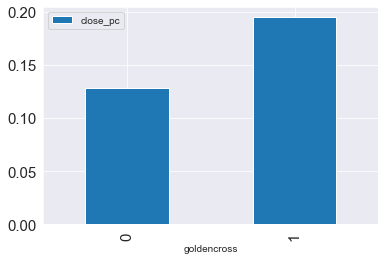

In [144]:
df.groupby('goldencross').agg({"close_pc" : "mean"}).plot(kind = 'bar')

<AxesSubplot:>

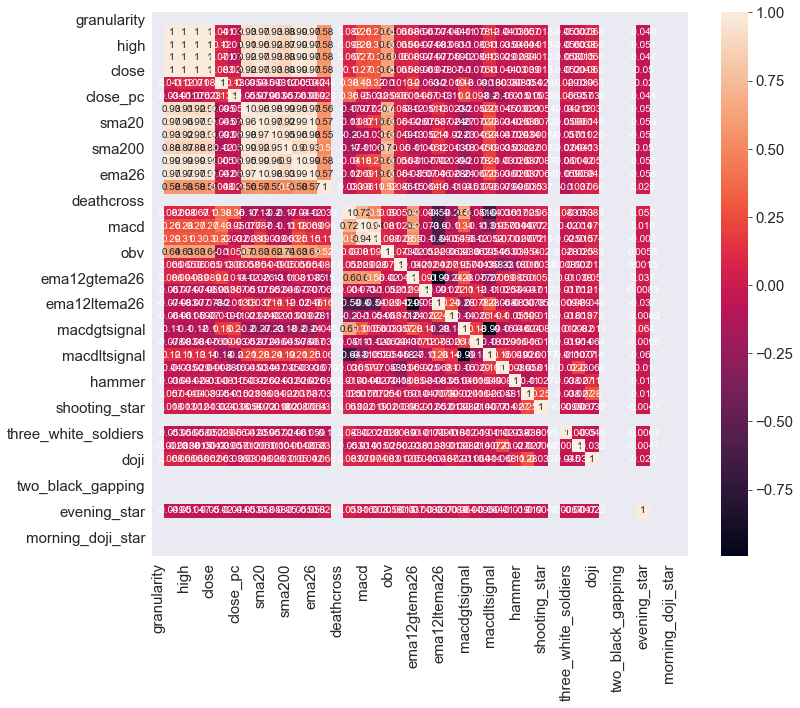

In [14]:
plt.figure(figsize = (12,10))
sns.heatmap(df.loc[:, [i for i in df.columns if "market" not in i]].corr(), annot=True)

<AxesSubplot:>

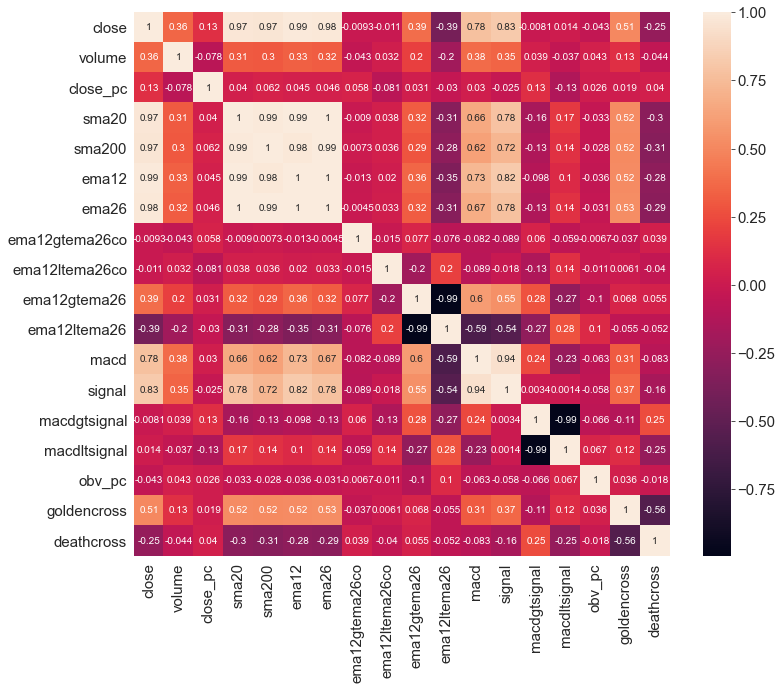

In [145]:
plt.figure(figsize = (12,10))
sns.heatmap(df.loc[:, [
    'close','volume','close_pc',
    'sma20','sma200',
    'ema12','ema26','ema12gtema26co','ema12ltema26co','ema12gtema26','ema12ltema26',
    'macd','signal','macdgtsignal','macdltsignal',
    'obv_pc',
    'goldencross','deathcross']].corr(), annot=True)

<AxesSubplot:xlabel='ema12', ylabel='close'>

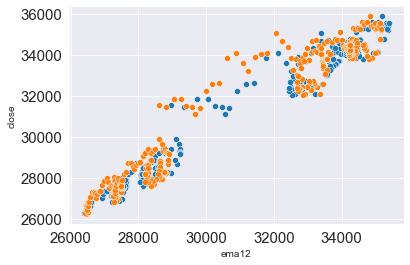

In [16]:
sns.scatterplot(data=df, x="ema12", y="close")
sns.scatterplot(data=df, x="ema26", y="close")

<AxesSubplot:>

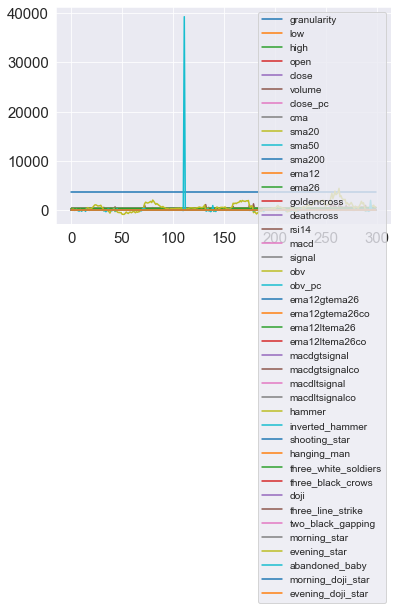

In [146]:
df.plot()

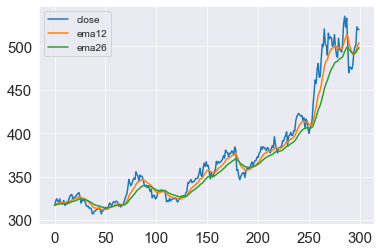

In [147]:
df[['close','ema12','ema26']].plot()
plt.show()

#### Splitting the Data into Train and Test sets

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [149]:
df.columns

Index(['date', 'market', 'granularity', 'low', 'high', 'open', 'close',
       'volume', 'close_pc', 'cma', 'sma20', 'sma50', 'sma200', 'ema12',
       'ema26', 'goldencross', 'deathcross', 'rsi14', 'macd', 'signal', 'obv',
       'obv_pc', 'ema12gtema26', 'ema12gtema26co', 'ema12ltema26',
       'ema12ltema26co', 'macdgtsignal', 'macdgtsignalco', 'macdltsignal',
       'macdltsignalco', 'hammer', 'inverted_hammer', 'shooting_star',
       'hanging_man', 'three_white_soldiers', 'three_black_crows', 'doji',
       'three_line_strike', 'two_black_gapping', 'morning_star',
       'evening_star', 'abandoned_baby', 'morning_doji_star',
       'evening_doji_star'],
      dtype='object')

# Seasonal ARIMA Model

In [189]:
from datetime import datetime

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

ts = pd.read_csv('./data/' + MARKET + '_3600_processed.csv', header=0, parse_dates=[1], index_col=1, squeeze=True, date_parser=parser)
ts = ts.drop("Unnamed: 0", axis=1)
ts = ts[['close']]
ts

,close
date,
2021-02-03 01:00:00,316.86
2021-02-03 02:00:00,320.99
2021-02-03 03:00:00,324.54
2021-02-03 04:00:00,322.32
2021-02-03 05:00:00,320.56
...,...
2021-02-15 08:00:00,499.27
2021-02-15 09:00:00,501.64
2021-02-15 10:00:00,522.44


/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


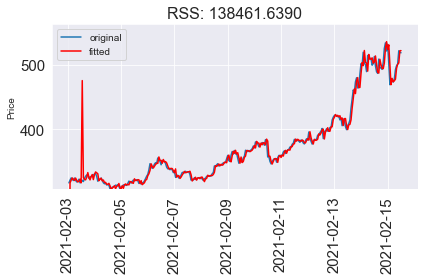

In [160]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(ts['close'], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results_ARIMA = model.fit(disp=-1)
fitted_values = results_ARIMA.fittedvalues

plt.plot(ts['close'], label='original')
plt.plot(fitted_values, color='red', label='fitted')
plt.ylim(bottom=np.amin(ts['close']))
plt.title('RSS: %.4f' % sum((fitted_values-ts['close'])**2))
plt.legend()
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.tight_layout()

In [164]:
from datetime import datetime, timedelta

start_date = ts.last_valid_index()
end_date = start_date + timedelta(days=1)
print (start_date, end_date)

pred = results_ARIMA.predict(start=str(start_date), end=str(end_date), dynamic=True)
pred

#plt.plot(pred, label='prediction')
#plt.ylabel('Price')
#plt.xlabel('Days')
#plt.xticks(rotation=90)
#plt.tight_layout()

2021-02-15 12:00:00 2021-02-16 12:00:00


2021-02-15 12:00:00    522.679684
2021-02-15 13:00:00    519.202622
2021-02-15 14:00:00    514.833457
2021-02-15 15:00:00    515.837120
2021-02-15 16:00:00    517.214770
2021-02-15 17:00:00    516.759900
2021-02-15 18:00:00    519.371251
2021-02-15 19:00:00    521.013447
2021-02-15 20:00:00    523.013728
2021-02-15 21:00:00    523.940295
2021-02-15 22:00:00    527.622373
2021-02-15 23:00:00    528.211186
2021-02-16 00:00:00    530.536078
2021-02-16 01:00:00    528.877775
2021-02-16 02:00:00    526.530989
2021-02-16 03:00:00    527.141330
2021-02-16 04:00:00    528.671641
2021-02-16 05:00:00    528.307847
2021-02-16 06:00:00    530.762280
2021-02-16 07:00:00    531.505820
2021-02-16 08:00:00    533.215124
2021-02-16 09:00:00    534.040963
2021-02-16 10:00:00    536.528496
2021-02-16 11:00:00    537.340533
2021-02-16 12:00:00    539.628803
Freq: H, Name: predicted_mean, dtype: float64

# Logistic Regression

In [260]:
df = pd.read_csv('./data/' + MARKET + '_3600_processed.csv')
df = df.drop("Unnamed: 0", axis=1)
df.head(5)

,date,market,granularity,low,high,open,close,volume,close_pc,cma,...,three_white_soldiers,three_black_crows,doji,three_line_strike,two_black_gapping,morning_star,evening_star,abandoned_baby,morning_doji_star,evening_doji_star
0,2021-02-03 01:00:00,BCH-GBP,3600,316.36,318.45,318.05,316.86,141.473288,0.00,316.860000,...,0,0,0,0,0,0,0,0,0,0
1,2021-02-03 02:00:00,BCH-GBP,3600,316.90,321.53,316.90,320.99,14.227563,1.30,318.925000,...,0,0,0,0,0,0,0,0,0,0
2,2021-02-03 03:00:00,BCH-GBP,3600,321.01,324.61,322.50,324.54,31.205738,1.11,320.796667,...,0,0,0,0,0,0,0,0,0,0
3,2021-02-03 04:00:00,BCH-GBP,3600,320.78,325.96,323.84,322.32,106.807731,-0.68,321.177500,...,0,0,0,0,0,0,0,0,0,0
4,2021-02-03 05:00:00,BCH-GBP,3600,319.27,321.84,321.80,320.56,26.656163,-0.55,321.054000,...,0,0,0,0,0,0,0,0,0,0


In [296]:
# Split into train and test sets

y = df['goldencross'] # must be a classification like a 1 or 0
X = df.loc[:, ['close']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=False)
df.shape, train.shape, test.shape

((300, 44), (211, 1), (90, 1))

In [297]:
logreg = LogisticRegression()

In [298]:
type(logreg)

sklearn.linear_model._logistic.LogisticRegression

In [299]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [300]:
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.8095238095238095, 1.0)

In [303]:
y_hat = logreg.predict(X_test)

X_test_display = X_test.copy()
X_test_display['goldencross_predicted'] = y_hat
X_test_display['goldencross_actual'] = y_test

X_test_display.head()

,close,goldencross_predicted,goldencross_actual
210,382.60,1,1
211,378.88,1,1
212,377.40,1,1
213,382.66,1,1
214,385.53,1,1


In [304]:
from sklearn.metrics import confusion_matrix, classification_report

In [305]:
confusion_matrix(y_test, y_hat)

array([[90]])

In [306]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        90

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



In [307]:
df['goldencross'].value_counts(normalize=True)

1    0.726667
0    0.273333
Name: goldencross, dtype: float64

# Decision Tree Model

In [308]:
tree_model = DecisionTreeClassifier(max_depth = 3)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [309]:
tree_model.score(X_train, y_train), tree_model.score(X_test, y_test)

(0.8428571428571429, 1.0)

In [310]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        90

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



# Persistence Algorithm

In [165]:
from datetime import datetime

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

ts = pd.read_csv('./data/' + MARKET + '_3600_processed.csv', header=0, parse_dates=[1], index_col=1, squeeze=True, date_parser=parser)
ts = ts.drop("Unnamed: 0", axis=1)
ts = ts[['close']]
ts

,close
date,
2021-02-03 01:00:00,316.86
2021-02-03 02:00:00,320.99
2021-02-03 03:00:00,324.54
2021-02-03 04:00:00,322.32
2021-02-03 05:00:00,320.56
...,...
2021-02-15 08:00:00,499.27
2021-02-15 09:00:00,501.64
2021-02-15 10:00:00,522.44


## Step 1: Define the Supervised Learning Problem

In [195]:
# Create lagged dataset
values = pd.DataFrame(ts.values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t-1', 't+1']
print(df.head(5))
print(df.tail(5))

          0
0    316.86
1    320.99
2    324.54
3    322.32
4    320.56
..      ...
295  499.27
296  501.64
297  522.44
298  519.83
299  519.34

[300 rows x 1 columns]
      t-1     t+1
0     NaN  316.86
1  316.86  320.99
2  320.99  324.54
3  324.54  322.32
4  322.32  320.56
        t-1     t+1
295  493.10  499.27
296  499.27  501.64
297  501.64  522.44
298  522.44  519.83
299  519.83  519.34


## Step 2: Train and Test Sets

In [176]:
# Split into train and test sets
X = df.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

X.shape, train.shape, test.shape

array([368.18, 368.94, 372.55, 371.9 , 376.96, 378.43, 384.5 , 381.45,
       384.36, 383.64, 381.86, 379.94, 383.55, 382.6 , 378.88, 377.4 ,
       382.66, 385.53, 383.39, 396.01, 387.18, 381.57, 377.25, 382.78,
       383.22, 384.17, 384.79, 391.19, 390.75, 395.  , 397.51, 401.55,
       385.78, 396.74, 397.68, 401.09, 397.29, 397.68, 402.95, 402.72,
       414.56, 419.03, 421.64, 422.79, 420.74, 419.89, 420.4 , 414.89,
       417.81, 405.89, 416.26, 414.  , 404.44, 399.71, 406.  , 409.21,
       414.58, 433.06, 447.69, 461.36, 457.36, 474.  , 480.44, 464.54,
       465.16, 486.11, 502.47, 499.82, 520.18, 502.83, 501.01, 490.  ,
       515.2 , 508.86, 510.82, 510.05, 500.  , 502.45, 513.53, 498.84,
       489.81, 487.39, 509.51, 496.51, 495.48, 493.61, 504.12, 526.11,
       534.77, 522.17, 532.54, 503.  , 469.65, 476.29, 475.48, 473.72,
       478.58, 493.1 , 499.27, 501.64, 522.44, 519.83])

In [177]:
train_X

array([316.86, 320.99, 324.54, 322.32, 320.56, 324.29, 320.74, 318.39,
       319.09, 322.5 , 316.99, 317.62, 320.91, 318.88, 323.72, 327.06,
       329.13, 329.11, 323.84, 326.16, 326.35, 327.44, 329.13, 330.56,
       331.57, 326.83, 319.45, 322.32, 322.37, 324.34, 321.13, 317.  ,
       315.46, 316.27, 313.65, 314.01, 313.33, 307.27, 307.23, 310.32,
       310.41, 311.54, 313.3 , 312.57, 314.14, 311.32, 307.03, 311.25,
       310.79, 313.62, 313.33, 313.35, 312.96, 315.9 , 319.54, 318.51,
       316.53, 319.02, 321.24, 319.86, 321.35, 321.68, 320.34, 315.95,
       318.25, 315.01, 316.71, 317.36, 319.93, 323.5 , 327.2 , 329.96,
       336.96, 346.69, 342.69, 339.42, 341.81, 346.07, 348.17, 346.77,
       355.54, 352.41, 350.32, 345.  , 351.79, 350.36, 350.34, 347.05,
       341.27, 338.72, 339.99, 337.28, 338.67, 337.05, 332.75, 335.6 ,
       325.45, 328.16, 328.71, 324.31, 325.2 , 329.2 , 333.  , 333.23,
       332.36, 334.87, 333.17, 334.  , 334.08, 329.7 , 321.04, 322.51,
      

In [178]:
test_X

array([368.18, 368.94, 372.55, 371.9 , 376.96, 378.43, 384.5 , 381.45,
       384.36, 383.64, 381.86, 379.94, 383.55, 382.6 , 378.88, 377.4 ,
       382.66, 385.53, 383.39, 396.01, 387.18, 381.57, 377.25, 382.78,
       383.22, 384.17, 384.79, 391.19, 390.75, 395.  , 397.51, 401.55,
       385.78, 396.74, 397.68, 401.09, 397.29, 397.68, 402.95, 402.72,
       414.56, 419.03, 421.64, 422.79, 420.74, 419.89, 420.4 , 414.89,
       417.81, 405.89, 416.26, 414.  , 404.44, 399.71, 406.  , 409.21,
       414.58, 433.06, 447.69, 461.36, 457.36, 474.  , 480.44, 464.54,
       465.16, 486.11, 502.47, 499.82, 520.18, 502.83, 501.01, 490.  ,
       515.2 , 508.86, 510.82, 510.05, 500.  , 502.45, 513.53, 498.84,
       489.81, 487.39, 509.51, 496.51, 495.48, 493.61, 504.12, 526.11,
       534.77, 522.17, 532.54, 503.  , 469.65, 476.29, 475.48, 473.72,
       478.58, 493.1 , 499.27, 501.64, 522.44, 519.83])

## Step 3: Persistence Algorithm

In [211]:
def model_persistence(x):
    # model code goes here for evaluation
    return x

## Step 4: Make and Evaluate Forecast

In [210]:
from sklearn.metrics import mean_squared_error

predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

368.18
368.94
372.55
371.9
376.96
378.43
384.5
381.45
384.36
383.64
381.86
379.94
383.55
382.6
378.88
377.4
382.66
385.53
383.39
396.01
387.18
381.57
377.25
382.78
383.22
384.17
384.79
391.19
390.75
395.0
397.51
401.55
385.78
396.74
397.68
401.09
397.29
397.68
402.95
402.72
414.56
419.03
421.64
422.79
420.74
419.89
420.4
414.89
417.81
405.89
416.26
414.0
404.44
399.71
406.0
409.21
414.58
433.06
447.69
461.36
457.36
474.0
480.44
464.54
465.16
486.11
502.47
499.82
520.18
502.83
501.01
490.0
515.2
508.86
510.82
510.05
500.0
502.45
513.53
498.84
489.81
487.39
509.51
496.51
495.48
493.61
504.12
526.11
534.77
522.17
532.54
503.0
469.65
476.29
475.48
473.72
478.58
493.1
499.27
501.64
522.44
519.83
Test MSE: 99.056


## Step 5: Plot Predictions and Expected Results

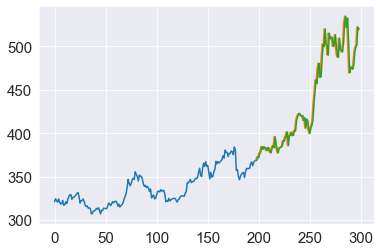

In [205]:
plt.plot(train_y)
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.show()

In [185]:
predictions

[368.18,
 368.94,
 372.55,
 371.9,
 376.96,
 378.43,
 384.5,
 381.45,
 384.36,
 383.64,
 381.86,
 379.94,
 383.55,
 382.6,
 378.88,
 377.4,
 382.66,
 385.53,
 383.39,
 396.01,
 387.18,
 381.57,
 377.25,
 382.78,
 383.22,
 384.17,
 384.79,
 391.19,
 390.75,
 395.0,
 397.51,
 401.55,
 385.78,
 396.74,
 397.68,
 401.09,
 397.29,
 397.68,
 402.95,
 402.72,
 414.56,
 419.03,
 421.64,
 422.79,
 420.74,
 419.89,
 420.4,
 414.89,
 417.81,
 405.89,
 416.26,
 414.0,
 404.44,
 399.71,
 406.0,
 409.21,
 414.58,
 433.06,
 447.69,
 461.36,
 457.36,
 474.0,
 480.44,
 464.54,
 465.16,
 486.11,
 502.47,
 499.82,
 520.18,
 502.83,
 501.01,
 490.0,
 515.2,
 508.86,
 510.82,
 510.05,
 500.0,
 502.45,
 513.53,
 498.84,
 489.81,
 487.39,
 509.51,
 496.51,
 495.48,
 493.61,
 504.12,
 526.11,
 534.77,
 522.17,
 532.54,
 503.0,
 469.65,
 476.29,
 475.48,
 473.72,
 478.58,
 493.1,
 499.27,
 501.64,
 522.44,
 519.83]

In [196]:
df

,t-1,t+1
0,NaN,316.86
1,316.86,320.99
2,320.99,324.54
3,324.54,322.32
4,322.32,320.56
...,...,...
295,493.10,499.27
296,499.27,501.64
297,501.64,522.44
298,522.44,519.83
